In [ ]:
# Please execute/shift-return this cell everytime you run the notebook.  Don't edit it. 
%load_ext autoreload
%autoreload 2
from notebook import * 

<div class="namebox">    
Double Click to edit and enter your

1.  Name
2.  PID
3.  @ucsd.edu email address
    
</div>

<div style=" font-size: 300% !important;
    margin-top: 1.5em;
    margin-bottom: 10px;
    font-weight: bold;
    line-height: 1.0;
    text-align:center;">
Programming Assignment/Lab 3: Optimizing LLMs through Parallel Architectures!
</div>

In this programming assignment, you'll practice how to parallelize a program using OpenMP. You should get roughly $1.5\times$  more speedup compared with the last programming assignment (i.e., $24\times$ on Gradescope after your parallelization). 

Check the course schedule for due date(s).

## Browser Compatibility

We are still working out some bugs in some browsers.  Here's the current status:

1.  Chrome -- well tested.  Preferred option.
2.  Firefox -- seems ok, but not thoroughly tested.
3.  Edge -- seems ok, but not thoroughly tested.
4.  Safari -- not supported at the moment.
5.  Internet Explorer -- not supported at the moment.

At the moment, the authentication step must be done in Chrome.

## Keeping Your assignment/lab Up-to-Date

Occasionally, there will be changes made to the base repository after the
lab is released.  This may include bug fixes and updates to this document.  We'll post on piazza/edstem when an update is available.

In those cases, you can use the following commands to pull the changes from upstream and merge them into your code.  You'll need to do this at a shell.  It won't work properly in the notebook.  Save your notebook in the browser first.


```
cd <your directory for this assignment/lab>git remote add upstream $(cat .starter_repo)  # You need to do this once each time you checkout a new assignment/lab. It will fail 
                                              # harmlessly if you run it more than once.
cp assignment-lab.ipynb assignment-lab.backup.ipynb                 # Backup your work.
git commit -am "My progress so far."          # commit your work.
git pull upstream main --allow-unrelated-histories -X theirs # pull the updates
```

Or you can use the script we provide:

In [ ]:
# Be sure to click save to preseve your progress before updating
! ./fix-repo
! ./pull-updates

Then, reload this page in your browser.

## How To Use This Document

You will use Jupyter Notebook to complete this assignment/lab.  You should be able to do much of this assignment/lab without leaving Jupyter Notebook.  The main exception will be some of the programming chanllenges.  The instructions will make it clear when you should use the terminal.

### Running Code

Jupyter Notebooks are made up of "cells".  Some have Markdown-formatted text in them (like this one).  Some have Python code (like the one below).

For code cells, you press `shift-return` to execute the code.  Try it below:

In [ ]:
print("I'm in python")

Code cells can also execute shell commands using the `!` operator.  Try it below:

In [ ]:
!echo "I'm in a shell"

### Telling What The Notebook is Doing

The notebook will only run one cell at a time, so if you press `shift-return` several times, the cells will wait for one another.  You can tell that a cell is waiting if it there's a `*` in the `[]` to the left the cell:

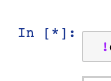


You'll can also tell _where_ the notebook is executing by looking at the table of contents on the left.  The section with the currently-executing cell will be red:

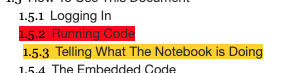

### What to Do Jupyter Notebook It Gets Stuck

First, check if it's actually stuck: Some of the cells take a while, but they will usually provide some visual sign of progress.  If _nothing_ is happening for more than 10 seconds, it's probably stuck.

To get it unstuck, you stop execution of the current cell with the "interrupt button":

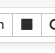

### Use VSCode

The container that we build for CSE142L provides a more friendly "VSCode" environment. To launch that environment, you should find and press the `+` icon near the file menu.

![plus.png](plus.png)

The interface will move to a launcher where you may find the following VSCode icon.

![vscode.png](vscode.png)

Press that icon and then you can enjoy VSCode environment!

# OpenMP (New For Programming Assignment 3)

OpenMP is automatically turned for your code in this assignment, so the `#pragma` command we used for the histogram should work fine.

If you want to compile at the command line, you'll need to either do 

```
export OPENMP=yes
```

once each time you log in or invoke `make` like so:

```
make my_train_gpt2 OPENMP=yes
```
each time you build.

## Key Commands

The three `#pragma`s you'll need for this assignment are 

1. `#pragma omp parallel for` for parallelizing loops.
2. `#pragma omp critical` for parallelizing loops.
3. `#pragma omp simd` for vectorizing loops

These are the only three used in the solution used to set the performance targets.

These three blog posts provide a good introduction to these commands:

* http://jakascorner.com/blog/2016/04/omp-introduction.html  
* http://jakascorner.com/blog/2016/05/omp-for.html
* http://jakascorner.com/blog/2016/07/omp-critical.html

They are required reading.

These articles provide some more advanced topics that might be useful:

* http://jakascorner.com/blog/2016/06/omp-for-scheduling.html
* http://jakascorner.com/blog/2016/06/omp-data-sharing-attributes.html
* http://jakascorner.com/blog/2016/07/omp-default-none-and-const.html

There's an enormous amount of bad information online about OpenMP.

## Looking at OpenMP Assembly

If you look at the assembly for OpenMP programs, you'll find that your loop body has been replaced with a function call.  OpenMP does this so it can tell it's worker threads to call the function to perform one iteration of your loop.

## Caveats for our Tools

First, `gprof` doesn't work on with multi-threaded programs.  You can use it for single-threaded runs, though.

Second, Moneta's cache model is not multithread-aware, so the cache hit/miss numbers for multithreaded programs are not meaningful.

Moneta may also show more threads that you might be expecting.  OpenMP threads seem to be Thread 0 and 13 and above.  If you see some threads that don't seem to be doing anything, that's not surprising or concerning.

Finally, our performance counting code only collects data for one thread.  For OpenMP code this is ok:  all the threads do basically the same thing.  But you'll notice, for instance, that if a loop runs in 4 threads, the measure instruction count will go down by ~1/4 (assuming multi-threading didn't add a lot of overhead).
 
 
## Controlling the Number of Threads

By default the autograder will run your code with 12 threads.  If you want to use a different number in your final run, you can call 

```			
omp_set_num_threads(thread_count);
```

in your function. You should call it before the first OpenMP `#pragma`.

I can control thread count during development with `-t`.  


# Large Language Models

Large Language Models (LLMs) are a type of artificial intelligence that can understand and generate human-like text. They are built upon a neural network architecture called the Transformer, which allows them to process and learn from vast amounts of text data. Through a process called "pretraining," LLMs learn to predict the next word in a sequence, effectively learning the patterns, grammar, and even some factual knowledge embedded in the training data. This pretraining typically involves massive datasets and significant computational resources. After pretraining, LLMs can be fine-tuned for specific tasks like summarization, translation, or question answering.

This project is based on `llm.c` repository by Andrej Karpathy provides a minimalist implementation of large language model training in pure C/CUDA, aiming for simplicity and efficiency without relying on large frameworks like PyTorch. The `train_gpt2.h` file within this repository provides a set of primitives that supports training a GPT-2 model.

Here's how the main function of `train_gpt2.c` uses the functions in `train_gpt2.h` in implementing the training:

* **GPT-2 Reproduction:** The code is specifically designed to reproduce the training of a GPT-2 (124M parameter) model. This involves implementing the forward and backward passes for all the Transformer layers that constitute the GPT-2 architecture.
* **Data Handling:** It handles the loading and processing of training data, such as the tokenized Tiny Shakespeare dataset, and works with a GPT-2 tokenizer.
* **Optimization:** The training process uses the AdamW optimizer, a common choice for training deep learning models, to update the model's parameters based on the calculated gradients.
* **Training Loop:** The `main` function in `train_gpt2.c` contains the primary training loop. This loop iteratively performs the following steps:
    1.  **Forward Pass:** Input data (a batch of sequences) is fed through the GPT-2 model to produce output logits (predictions for the next token).
    2.  **Loss Calculation:** The difference between the predicted logits and the actual next tokens is quantified using a loss function (e.g., cross-entropy loss).
    3.  **Backward Pass (Backpropagation):** Gradients are calculated, indicating how much each parameter in the model contributes to the loss. This is done by propagating the error backward through the network.
    4.  **Parameter Update:** The AdamW optimizer uses these gradients to adjust the model's weights, aiming to minimize the loss in subsequent steps.
* **Simplified Approach:** Unlike more complex training setups, `train_gpt2.c` allocates all its GPU (or CPU) memory at the start, ensuring a constant memory footprint during training. It focuses on the fundamental arithmetic operations of neural network training, demonstrating that the process can be boiled down to a series of simple computations on float arrays.

Due to the significance of LLMs in modern AI applications, the performance of training LLM models matters when deploying applications. Based on Amdahl's Law, we should target the most time consuming function first. Even without any prior knowledge about, we can still know what's the most time-consuming function when training an LLM model through `perf record` and `perf report` as below.

**Notice: Training would take quite a long time -- about 6-10 minutes**

In [ ]:
# Compile the code with the debug flag.
! make clean; make OPT_CFLAGS="-g" train_gpt2

In [ ]:
# Run the "real" training process and record the profiled information.
! cse142 run "perf record ./train_gpt2 > perf.data"

In [ ]:
render_csv("baseline.csv")

Now, we can use `perf report` to interpret the output as human-readable content using the following cell.

In [ ]:
# Figure out the most time-consuming function.
! perf report --stdio > perf.out

The output file is really long, and the goal is never about optimizing everything. So we can use `head` command to see what's in the first 20 lines of the output.

In [ ]:
! head -20 perf.out

Have you find which function takes the most significant amount of time? Is it the same as our last lab?

Through profiling the training process, we know `matmul_backward` in `train_gpt2.h` is the most time-consuming function. Let's dive in the code.

In [ ]:
render_code("train_gpt2.h", show="matmul_backward")

# Programming Assignment

{    "deletable": false,
    "editable": false}As you may imagine, this programming assignment is targeting at optimizing the most time consuming function(s) in the baseline `train_gpt2` to reducing the overall training time. In this project, your allowed to put your optimization in `my_train_gpt2.h` and we will compare the performance of `my_train_gpt2` with the baseline `train_gpt2`.

## Developing and testing

To save the develop time, we **strongly encourage** you to perform the testing of function optimizations using a scaled-down `test_gpt2` and `my_test_gpt2` programs. Where the `test_gpt2` include the baseline functions, and `my_test_gpt2` will use the `my_train_gpt2.h` functions.

In [ ]:
!make clean test_gpt2 my_test_gpt2

In [ ]:
!cse142 run "./test_gpt2"

Beyond the timestamps the code provides, you may also read the performance counter based information as we generated below. The overall code has a miss rate of 8.2%. If you want, you can insert code in the target function for more detailed profiling and you will find the target function has a cache miss rate of 16%.

In [ ]:
render_csv("baseline_test.csv")

As our version resides in the `my_train_gpt2.h`, we also created a program `my_test_gpt2` to evaluate the effectiveness of our optimizations. You may run the following to compile your optimized version.

In [ ]:
!make clean my_test_gpt2

If everything compiles, you may test your version using the following cell.

In [ ]:
!cse142 run "./my_test_gpt2"

In [ ]:
render_csv("my_test.csv")

## Final Evaluation

Remember, the program in the previous section is just a simplified version to test the performance. We are aiming at the complete training process with real data. Therefore, you will need to compile and test your program with the following two cells.

In [ ]:
!make clean my_train_gpt2

In [ ]:
!cse142 run "./my_train_gpt2"

And you can see the performance counter based timing information through below. **You will need to achieve 1.1x on Gradescope (around 1.13x speedup on our cluster) to receive full credits for this assignment. Only the performance number on Gradescope counts toward your grading**. The cluster and Gradescope use very similar CPU architectures. Therefore, the optimizations you applied should work on both sides.

In [ ]:
render_csv("my_train.csv")

When your submit your code for autograding, it'll run in a more tightly controlled way that let's us reliably measure performance and grade your submission. You can simulate it like this:

In [ ]:
! python ./autograde.py  --submission . --results -

If you ran the original code, it gets zero points (`"score": 0`).  Once you correctly modify `train_gpt2.h`, you'll get 100 point.

Once you are happy with your code, commit your changes to ``train_gpt2.h`.  You'll have to do this to turn it for official autograding.

In [ ]:
!git commit -am "Yay! I finished the 2nd assignment!"
!git push

**If this asks you for a password, it means you forgot some initial steps in the README.md file of this repo. You'll need to interrupt your Jupyter notebook kernel and follow the exact steps in the README.md before you can start again.**

## Useful C++ Tips

There are few things in C++ that might be useful in this assignment.

### Controlling Compiler Optimizations

First, you can prevent inlining of a particular function by declaring it like so:

```
void __attribute__((noinline)) join_solution(...)
```

This can make it easier to debug, because you can set a breakpoint on the function and it'll work like you expect.

Second, you can turn on arbitrary optimizations for particular functions like so:

```
#pragma GCC push_options
#pragma GCC optimize ("unroll-loops")

void your_function() {
}

#pragma GCC pop_options
```


### Assertions

The `assert()` macro is useful tool for debugging and to avoid silly errors.

If you say

```
assert(a > b);
```

And the expression is not true at run time, the assert with "fail" your program will crash with a somewhat useful error message.

This is a useful way to document and enforce assumptions you make in your code.  For instance, I used an assert in `convolution_tiled_split()` to ensure that the tile size was > 8.

You can get access to  `assert()` with 

```
#include<cassert>
```

The overhead of asserts is low, but not zero.  I would not put any in one of your performance-critical loops.

If you want to include asserts in performance-critical areas, you can add `-DNDEBUG` to the optimizations in `config.make`.  It'll disable all the `assert()`s.


### Debugging 

Your code will certainly have errors in it, and you'll need to debug.  THe first thing you need to do is to tone down the optimizations, because they make debugging almost impossible.  Recall that `-Og` is the right flag to use for optimization while debugging:

In [ ]:
!make clean my_test_gpt2 OPT_CFLAGS="-g"

Unfortunately, the Linux debugger `gdb` doesn't work inside the note book.  If you want to use it, you can do so at the terminal:

```
$ gdb ./my_test_gpt2
GNU gdb (Ubuntu 9.2-0ubuntu1~20.04.2) 9.2
Copyright (C) 2020 Free Software Foundation, Inc.
License GPLv3+: GNU GPL version 3 or later <http://gnu.org/licenses/gpl.html>
This is free software: you are free to change and redistribute it.
There is NO WARRANTY, to the extent permitted by law.
Type "show copying" and "show warranty" for details.
This GDB was configured as "x86_64-linux-gnu".
Type "show configuration" for configuration details.
For bug reporting instructions, please see:
<http://www.gnu.org/software/gdb/bugs/>.
Find the GDB manual and other documentation resources online at:
    <http://www.gnu.org/software/gdb/documentation/>.

For help, type "help".
Type "apropos word" to search for commands related to "word"...
Reading symbols from ./my_test_gpt2...
(gdb) 
```

The best place to start is at `matmul_backward`.  From there you can step into your solution code.

```
bash$ gdb 
(gdb) break matmul_backward
Breakpoint 1 at 0x9fd0: matmul_backward. (2 locations)
```

Sometimes that will note give a good result, even without optimizations.  Instead, you can set a break point at a line number:

```
bash$ gdb alloc_main.exe
(gdb) break join_solution.hpp:47
(gdb) run --function join_solution_c --size 100  --power 2
(gdb) list
```

There's a pretty good `gdb` [tutorial here](https://www.cs.cmu.edu/~gilpin/tutorial/).

## Things To Try

### Non-Deterministic Tests (New for this assignment)

With threading, comes non-deterministic bugs.  This means that the tests may fail only occasionally for your code.  If this seems to be happening, a good strategy is to just run them repeatedly and confirm that it's the case.

It's not a bug in the benchmark, you have a thread synchronization error.


### General Tips (New for this assignment)

In the examples we saw that loop tiling and OpenMP pragmas can work well together.  This carries through to how you should figure out what to parallelize.  It's worth your time to try parallelizing different loops and changing how your loops are nested to accommodate that.

A few tips:

1.  Use `ET` to guide your optimizations.
1.  At this points you have many tools avaiassignmentle to you -- `omp parallel for`, `omp simd`, compiler optimizations, tiling.  The number of combinations is enormous.   I suggest applying them in this order (from largest impact-per-effort to smallest):
    1.  Get last assignment into good shape (see notes above and slides from class)
    2.  `omp parallel for`
    3.  `omp simd`
    4.  Fiddling with other compiler options/per-function compiler options.
    5.  Crazy stuff like intrinsics for better SIMD performance.
1.  While tiling only applied to loops with reuse (because temporal locality requires reuse), `parallel for` can apply to loops without reuse.  Same for `omp simd`.
2.  `omp parallel for` implicitly does tiling, since it divides the iterations of the parallel loop across several cores.
1.  Nesting parallel for loops with OpenMP is not usually a good idea (although it should work).  Start by picking one loop to parallelize.
2.  You want to parallelize an outer loop, so that the threads are working on large pieces of computation and need to synchronize less.
3.  Pay close attention to whether iterations of your parallel loop are writing to the same locations.  If so, you'll need a `omp critical` to ensure correct updates.

This last point can be tricky.  If I have this code:

```
#pragma omp parallel for
for(int i = 0; i < 10; i++) {
    for(int j = 0; j < 10; j++) {
        for(int k = 0; k < 10; k++) {
            X[i][j] += Y[k][j];
```

The only store is the assignment to `X(i, j)`.  Since `i` is the index of the parallel loop, I know that no other thread will be updating `X(i,j)`, since no other thread will have the same value of `i`.

However, in this code:

```
#pragma omp parallel for
for(int i = 0; i < 10; i++) {
    for(int j = 0; j < 10; j++) {
        for(int k = 0; k < 10; k++) {
            X[k][j] += Y[i][j];
```

I don't have the same guarantee.  Since `i` does is not used to select an element in `X`, every other thread will write to that location as well.  In that case, I could do

```
#pragma omp parallel for
for(int i = 0; i < 10; i++) {
    for(int j = 0; j < 10; j++) {
        for(int k = 0; k < 10; k++) {
#pragma omp critical
            X[k][j] += Y[i][j];
```
Which will probably be really slow, or I could create a private tensor, do my updates there, and then merge them into `X`.

5.  Pay close attention to write sharing when you are deciding how to parallelize.  Can the iterations of your parallel loop iterations write to the same place?
4.  `omp simd` only works on inner loops.
5.  `omp parallel for` works best on outer loops.
7.  `gprof` doesn't work for multithreading, so use `ET` to measure how long things take.


<div class="alert alert-block alert-danger">

**Only Gradescope Counts** The scores produced here **do not** count.  Only gradescope counts.  The results here should match what Gradescope does, but I would test your solution on Gradescope well-ahead of the deadline to ensure your code is working like you expect.
    
</div>

# Turning in the programming assignment/lab


You need to turn in your notebook and your programming assignment/lab in the specific gradescope item.  
After you complete the assignment/lab, you will turn it in by submitting your latest github repository.

**Step 1:**  Save your workbook!!!

In [ ]:
!for i in 1 2 3 4 5; do echo Save your files!!; sleep 1; done

**Step 2:**  Commit everything. Please run the following command.

In [ ]:
!git commit -am "Yay! I am ready to turn in!"
!git push

**Step 3**: 
Submit through gradescope
You'll turn in your programming assignment by providing gradescope with your github repo of this assignment.   It'll run the autograder and return the results.